## problem statement
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam. The key aim of this project is to detect whether a mail is spam or ham.


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samrat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [5]:
corpus=[]
#array to store the data after the process of stemming and removal of unnecessary words

In [ ]:
,encoding='cp1252'

In [2]:
df=pd.read_csv('spam.csv',encoding='cp1252')

In [3]:
df=df.iloc[0:,0:2]

In [4]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [5]:
df.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
df.dtypes

label      object
message    object
dtype: object

## Data preprocessing

In [68]:
for i in range(0,len(df)):
    rev=re.sub('[^a-zA-Z]',' ', df['message'][i])
    rev=rev.lower()
    rev=rev.split()
    
    rev=[ps.stem(word) for word in rev if not word in stopwords.words('english')]
    rev=' '.join(rev)
    corpus.append(rev)

In [69]:
len(corpus)

5572

## developing the BagofWords model

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()


## Label encoding

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
df['label']=le.fit_transform(df['label'])

In [73]:
df.head(10)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [79]:
y=df['label']

0: ham
1: span

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

## Multinomial NB

In [93]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
model_selection(mnb)

at random state 0,  accuracy score is 0.9784688995215312
at random state 0, confusion matrix is [[1406   28]
 [   8  230]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1434
           1       0.89      0.97      0.93       238

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



at random state 1,  accuracy score is 0.9772727272727273
at random state 1, confusion matrix is [[1428   26]
 [  12  206]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1454
           1       0.89      0.94      0.92       218

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



at rando

at random state 17,  accuracy score is 0.9760765550239234
at random state 17, confusion matrix is [[1418   24]
 [  16  214]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1442
           1       0.90      0.93      0.91       230

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



at random state 18,  accuracy score is 0.9778708133971292
at random state 18, confusion matrix is [[1430   28]
 [   9  205]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1458
           1       0.88      0.96      0.92       214

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672



at

at random state 34,  accuracy score is 0.9736842105263158
at random state 34, confusion matrix is [[1423   29]
 [  15  205]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1452
           1       0.88      0.93      0.90       220

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.94      1672
weighted avg       0.97      0.97      0.97      1672



at random state 35,  accuracy score is 0.9766746411483254
at random state 35, confusion matrix is [[1419   30]
 [   9  214]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1449
           1       0.88      0.96      0.92       223

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672



at

at random state 51,  accuracy score is 0.9694976076555024
at random state 51, confusion matrix is [[1412   35]
 [  16  209]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1447
           1       0.86      0.93      0.89       225

    accuracy                           0.97      1672
   macro avg       0.92      0.95      0.94      1672
weighted avg       0.97      0.97      0.97      1672



at random state 52,  accuracy score is 0.9772727272727273
at random state 52, confusion matrix is [[1416   28]
 [  10  218]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1444
           1       0.89      0.96      0.92       228

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672



at

at random state 68,  accuracy score is 0.979066985645933
at random state 68, confusion matrix is [[1436   26]
 [   9  201]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1462
           1       0.89      0.96      0.92       210

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672



at random state 69,  accuracy score is 0.9700956937799043
at random state 69, confusion matrix is [[1396   35]
 [  15  226]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1431
           1       0.87      0.94      0.90       241

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.94      1672
weighted avg       0.97      0.97      0.97      1672



at 

at random state 85,  accuracy score is 0.9766746411483254
at random state 85, confusion matrix is [[1419   27]
 [  12  214]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1446
           1       0.89      0.95      0.92       226

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



at random state 86,  accuracy score is 0.9760765550239234
at random state 86, confusion matrix is [[1425   27]
 [  13  207]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1452
           1       0.88      0.94      0.91       220

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



at

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=0.20)
mnb.fit(x_train,y_train)

MultinomialNB()

In [95]:
pred_test=mnb.predict(x_test)

at random state 8,  accuracy score is 0.9811659192825112
at random state 8, confusion matrix is [[949  16]
 [  5 145]]
at random state 8, classification report is               precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.90      0.97      0.93       150

    accuracy                           0.98      1115
   macro avg       0.95      0.98      0.96      1115
weighted avg       0.98      0.98      0.98      1115





Text(0.5, 0, 'predicted label')

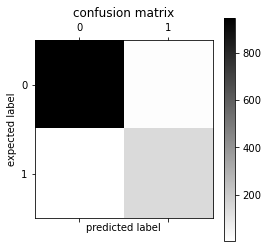

In [97]:
print(f"at random state 8,  accuracy score is {accuracy_score(y_test,pred_test)}")
print(f"at random state 8, confusion matrix is {confusion_matrix(y_test,pred_test)}")
print(f"at random state 8, classification report is {classification_report(y_test,pred_test)}")
print("\n")

plt.matshow(confusion_matrix(y_test, pred_test), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

## Conclusion
at random state=8 the model has highest accuracy 